# MELBOURNE HOUSING 

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import f_oneway
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import ExtraTreesRegressor
import warnings 
warnings.filterwarnings("ignore")

## OVERVIEW

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df.tail(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique())) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Suburb,object,0,351,"[Abbotsford, Airport West, Albert Park, Alphin..."
1,Address,object,0,34009,"[68 Studley St, 85 Turner St, 25 Bloomburg St,..."
2,Rooms,int64,0,12,"[2, 3, 4, 1, 5, 6, 7, 8, 10, 9, 12, 16]"
3,Type,object,0,3,"[h, u, t]"
4,Price,float64,7610,2871,"[nan, 1480000.0, 1035000.0, 1465000.0, 850000...."
5,Method,object,0,9,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
6,SellerG,object,0,388,"[Jellis, Biggin, Rounds, Nelson, Collins, Ding..."
7,Date,object,0,78,"[3/09/2016, 3/12/2016, 4/02/2016, 4/03/2017, 4..."
8,Distance,float64,1,215,"[2.5, 13.5, 3.3, 6.4, 13.8, 11.1, 6.3, 5.9, 11..."
9,Postcode,float64,1,211,"[3067.0, 3042.0, 3206.0, 3078.0, 3018.0, 3025...."


In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## DATA DESCRIPTION

Background:
Melbourne is currently experiencing a housing bubble, 
(some experts say it may burst soon).

Some Key Details:
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

## PREPROCESSING

### Missing Values

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace = True, ascending = False)
missing_value_df[missing_value_df['percent_missing'] > 0]

,percent_missing
BuildingArea,60.576068
YearBuilt,55.386293
Landsize,33.881286
Car,25.039447
Bathroom,23.599277
Bedroom2,23.573457
Longtitude,22.882061
Lattitude,22.882061
Price,21.832057
Regionname,0.008607


1. Menghapus kolom BuildingArea

In [9]:
cols1 = df[['BuildingArea']]
df = df.drop(cols1, axis = 1)

2. Mengisi missing values dari kolom YearBuilt dengan 0

In [10]:
df['YearBuilt'] = df['YearBuilt'].fillna(0)

3. Menghandle kolom dengan missing values < 1%

In [11]:
df[df['Regionname'].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Karena data fitur lain banyak yang merupakan missing values juga pada baris data missing value di Regionname, jadi missing values pada kolom Regionname dihapus.

In [12]:
df = df.dropna(subset=['Regionname'], axis = 0)

4. Menghapus kolom Lattitude dan Longtitude

In [13]:
df = df.drop(['Lattitude', 'Longtitude'], axis = 1)

In [14]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8214
Bathroom          8223
Car               8725
Landsize         11807
YearBuilt            0
CouncilArea          0
Regionname           0
Propertycount        0
dtype: int64

**Cek korelasi**

In [15]:
df_cat = df.select_dtypes(['object'])
df_con = df.drop(columns = df_cat.columns)

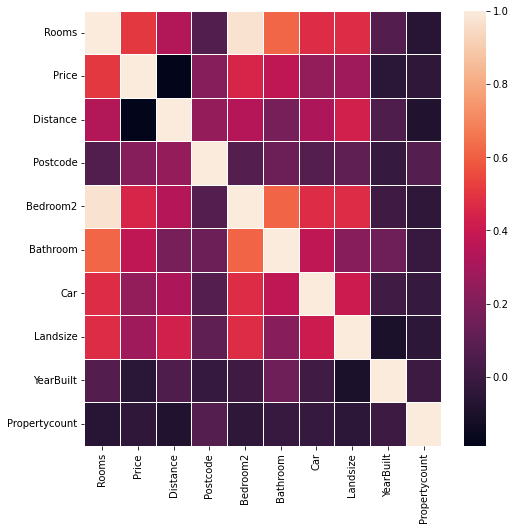

In [16]:
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(df_con.corr('spearman'), annot =False, linewidths=0.5, linecolor = "white", fmt=".1f", ax=ax)
plt.show()

Melihat korelasi antar fitur

4. Missing values pada 'Bathroom'

In [17]:
con_corr = df_con.corr('spearman')
con_corra_table = con_corr['Bathroom'].sort_values(ascending = False).drop_duplicates().to_frame()
con_corra_table.columns = ['Correlation Coefficient']
con_corra_table.head()

,Correlation Coefficient
Bathroom,1.000000
Rooms,0.615242
Bedroom2,0.611565
Car,0.372878
Price,0.372804


In [18]:
df.loc[df.Bathroom.isnull(), 'Bathroom']  = df.groupby('Rooms')['Bathroom'].transform(lambda x: x.fillna(x.mean()))

5. Missing values pada Bedroom2

In [19]:
con_corra_table = con_corr['Bedroom2'].sort_values(ascending = False).drop_duplicates().to_frame()
con_corra_table.columns = ['Correlation Coefficient']
con_corra_table.head()

,Correlation Coefficient
Bedroom2,1.000000
Rooms,0.970020
Bathroom,0.611565
Car,0.474742
Landsize,0.471770


In [20]:
df.loc[df.Bedroom2.isnull(), 'Bedroom2']  = df.groupby('Rooms')['Bedroom2'].transform(lambda x: x.fillna(x.mean()))

5. Missing values pada kolom Car

In [21]:
con_corra_table = con_corr['Car'].sort_values(ascending = False).drop_duplicates().to_frame()
con_corra_table.columns = ['Correlation Coefficient']
con_corra_table.head()

,Correlation Coefficient
Car,1.000000
Bedroom2,0.474742
Rooms,0.471188
Landsize,0.409892
Bathroom,0.372878


In [22]:
df.groupby('Type')['Car'].value_counts()

Type  Car 
h     2.0     10436
      1.0      5112
      3.0      1528
      0.0      1371
      4.0      1137
      5.0       148
      6.0       139
      7.0        24
      8.0        23
      10.0        6
      9.0         3
      11.0        2
      12.0        1
      18.0        1
      26.0        1
t     2.0      1058
      1.0       800
      3.0        42
      0.0        24
      4.0        16
      5.0         1
u     1.0      3252
      2.0       720
      0.0       236
      3.0        36
      4.0         8
      5.0         2
      6.0         1
      7.0         1
Name: Car, dtype: int64

In [23]:
df.loc[df.Car.isnull(), 'Car']  = df.groupby('Type')['Car'].transform(lambda x: x.fillna(x.mean()))

6. Missing values pada kolom Landsize

In [24]:
con_corra_table = con_corr['Landsize'].sort_values(ascending = False).drop_duplicates().to_frame()
con_corra_table.columns = ['Correlation Coefficient']
con_corra_table.head()

,Correlation Coefficient
Landsize,1.000000
Rooms,0.473969
Bedroom2,0.471770
Distance,0.433028
Car,0.409892


In [25]:
df1 = df.dropna(subset = ['Landsize'], axis = 0)

In [26]:
# cek apakah kolom Type dan Landsize memiliki korelasi menggunakan ANOVA  
# asumsi H0 yaitu Type tidak berkorelasi dengan Landsize
CategoryGroupLists1 = df1.groupby('Type')['Landsize'].apply(list)

# Performing the ANOVA test
# Terima H0 jika p-value > 0.05
AnovaResults1 = f_oneway(*CategoryGroupLists1)
print('P-Value : ', AnovaResults1[1])

P-Value :  3.717354205633393e-05


In [27]:
df.loc[df.Landsize.isnull(), 'Landsize']  = df.groupby('Type')['Landsize'].transform(lambda x: x.fillna(x.mean()))

In [28]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
YearBuilt           0
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

7. Missing values pada kolom Price

In [29]:
df = df.dropna(subset = ['Price'], axis = 0)

In [30]:
df.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
YearBuilt        False
CouncilArea      False
Regionname       False
Propertycount    False
dtype: bool

### Outliers

In [31]:
cols = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

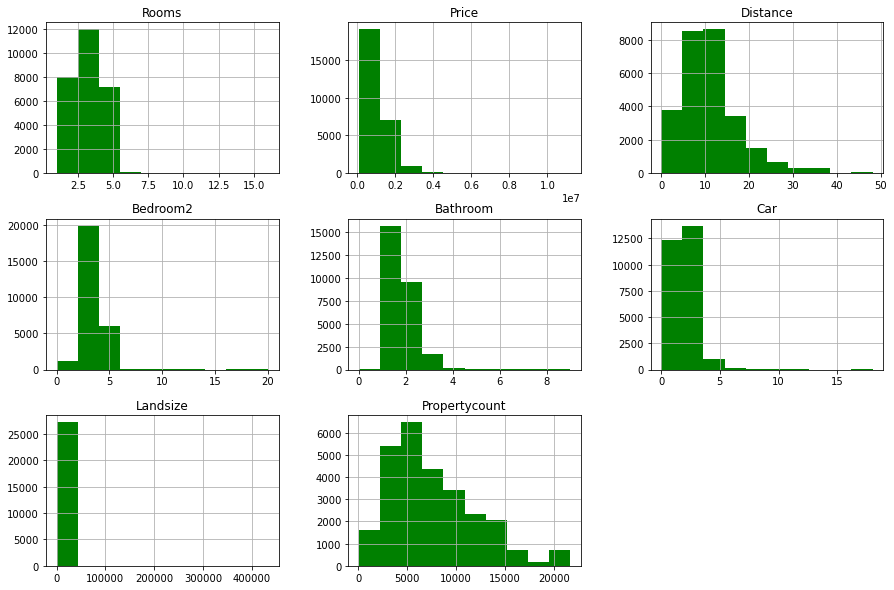

In [32]:
df[cols].hist(figsize=(15,10), color = 'green');

In [33]:
cols_n = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

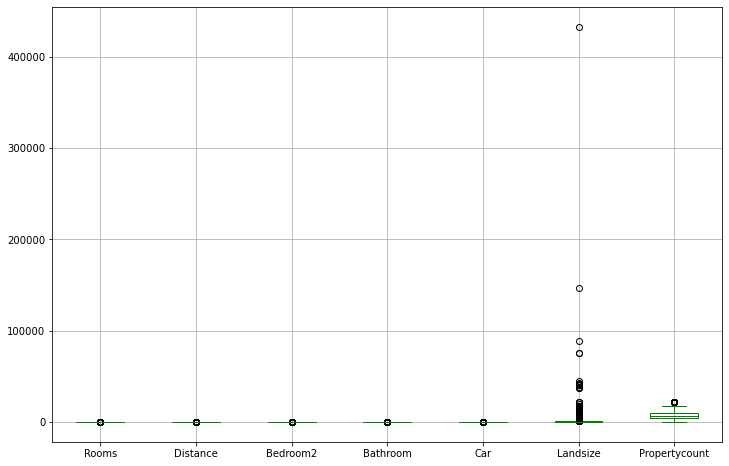

In [34]:
df[cols_n].boxplot(figsize=(12,8), color = 'green');

Terdapat outlier pada kolom Landsize dan Propertycount

1. Kolom Landsize

Text(0.5, 1.0, 'Sebelum handling outlier')

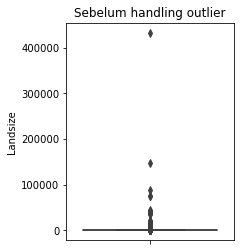

In [35]:
plt.figure(figsize=(3,4))
sns.boxplot(data = df, y='Landsize')
plt.title('Sebelum handling outlier')

In [36]:
for x in ['Landsize']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    upper_bound = q75+(1.5*intr_qr)
    lower_bound = q25-(1.5*intr_qr)
 
    df.loc[df[x] < lower_bound,x] = lower_bound
    df.loc[df[x] > upper_bound,x] = upper_bound

Text(0.5, 1.0, 'Setelah handling outlier')

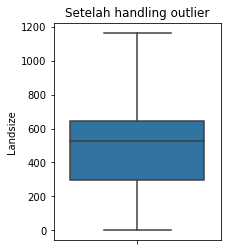

In [37]:
plt.figure(figsize=(3,4))
sns.boxplot(data = df, y='Landsize')
plt.title('Setelah handling outlier')

2. Kolom Propertycount

Text(0.5, 1.0, 'Sebelum handling outlier')

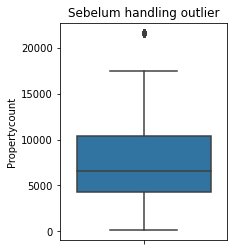

In [38]:
plt.figure(figsize=(3,4))
sns.boxplot(data = df, y='Propertycount')
plt.title('Sebelum handling outlier')

Memfilter value Propertycount < 20000

In [39]:
df = df.loc[df['Propertycount'] < 20000]

Text(0.5, 1.0, 'Setelah handling outlier')

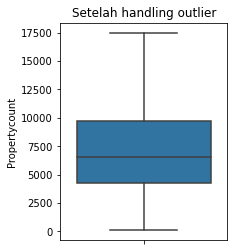

In [40]:
plt.figure(figsize=(3,4))
sns.boxplot(data = df, y='Propertycount')
plt.title('Setelah handling outlier')

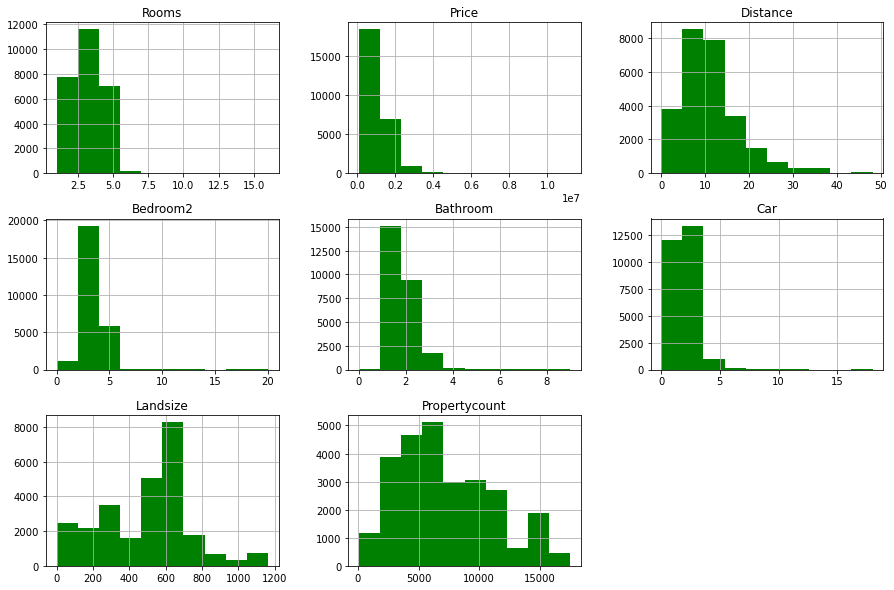

In [41]:
df[cols].hist(figsize=(15,10), color = 'green');

## FEATURE ENGINEERING

In [42]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,0.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26517 non-null  object 
 1   Address        26517 non-null  object 
 2   Rooms          26517 non-null  int64  
 3   Type           26517 non-null  object 
 4   Price          26517 non-null  float64
 5   Method         26517 non-null  object 
 6   SellerG        26517 non-null  object 
 7   Date           26517 non-null  object 
 8   Distance       26517 non-null  float64
 9   Postcode       26517 non-null  float64
 10  Bedroom2       26517 non-null  float64
 11  Bathroom       26517 non-null  float64
 12  Car            26517 non-null  float64
 13  Landsize       26517 non-null  float64
 14  YearBuilt      26517 non-null  float64
 15  CouncilArea    26517 non-null  object 
 16  Regionname     26517 non-null  object 
 17  Propertycount  26517 non-null  float64
dtypes: flo

In [44]:
df.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
YearBuilt        False
CouncilArea      False
Regionname       False
Propertycount    False
dtype: bool

### ENCODING

#### Kolom Type

In [45]:
df['Type'].nunique()

3

In [46]:
dummies_type = pd.get_dummies(df.Type, prefix = 'Type', drop_first = True)
df = pd.concat([df, dummies_type], axis = 1)
df = df.drop('Type', axis = 1)

#### Kolom Method

In [47]:
df.Method.nunique()

5

In [48]:
dummies_method = pd.get_dummies(df.Method, prefix = 'Method', drop_first = True)
df = pd.concat([df, dummies_method], axis = 1)
df = df.drop('Method', axis = 1)

#### Kolom Regionname

In [49]:
df['Regionname'].nunique()

8

In [50]:
df['Regionname'].value_counts()

Southern Metropolitan         8524
Northern Metropolitan         7137
Western Metropolitan          5815
Eastern Metropolitan          3272
South-Eastern Metropolitan    1341
Eastern Victoria               166
Northern Victoria              166
Western Victoria                96
Name: Regionname, dtype: int64

In [51]:
count_region = df.Regionname.value_counts()[5:].index
df['Regionname'] = df['Regionname'].replace(count_region, 'Other')
dummies_region = pd.get_dummies(df.Regionname, prefix = 'Regionname', drop_first = True)

In [52]:
df = pd.concat([df, dummies_region], axis = 1)
df = df.drop('Regionname', axis = 1)

#### Kolom CouncilArea

In [53]:
df['CouncilArea'].nunique()

33

In [54]:
df['CouncilArea'].value_counts()

Boroondara City Council           2520
Moreland City Council             1790
Glen Eira City Council            1643
Darebin City Council              1622
Moonee Valley City Council        1584
Melbourne City Council            1502
Banyule City Council              1457
Brimbank City Council             1366
Bayside City Council              1311
Maribyrnong City Council          1221
Hume City Council                 1036
Monash City Council               1007
Port Phillip City Council          952
Yarra City Council                 918
Stonnington City Council           884
Manningham City Council            842
Hobsons Bay City Council           799
Kingston City Council              735
Whittlesea City Council            709
Wyndham City Council               492
Whitehorse City Council            435
Maroondah City Council             356
Knox City Council                  287
Melton City Council                243
Frankston City Council             229
Greater Dandenong City Co

In [55]:
count_councilarea = df.CouncilArea.value_counts()[5:].index
df['CouncilArea'] = df['CouncilArea'].replace(count_councilarea, 'Other')
dummies_councilarea = pd.get_dummies(df.CouncilArea, prefix = 'CouncilArea', drop_first = True)

In [56]:
df = pd.concat([df, dummies_councilarea], axis = 1)
df = df.drop('CouncilArea', axis = 1)

#### Kolom Date

In [57]:
df['Date'].nunique()

78

In [58]:
df['Date'].value_counts()

28/10/2017    860
17/03/2018    738
24/02/2018    713
9/12/2017     707
18/11/2017    671
             ... 
4/02/2016      35
30/09/2017     17
20/01/2018     12
27/01/2018     11
28/01/2016      2
Name: Date, Length: 78, dtype: int64

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].value_counts()

2017-10-28    860
2018-03-17    738
2018-02-24    713
2017-09-12    707
2017-11-18    671
             ... 
2016-04-02     35
2017-09-30     17
2018-01-20     12
2018-01-27     11
2016-01-28      2
Name: Date, Length: 78, dtype: int64

In [60]:
df['Date_year'] = df.Date.dt.year
df['Date_month'] = df.Date.dt.month
df['Date_day'] = df.Date.dt.day

In [61]:
df = df.drop('Date', axis = 1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 1 to 34856
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Suburb                                  26517 non-null  object 
 1   Address                                 26517 non-null  object 
 2   Rooms                                   26517 non-null  int64  
 3   Price                                   26517 non-null  float64
 4   SellerG                                 26517 non-null  object 
 5   Distance                                26517 non-null  float64
 6   Postcode                                26517 non-null  float64
 7   Bedroom2                                26517 non-null  float64
 8   Bathroom                                26517 non-null  float64
 9   Car                                     26517 non-null  float64
 10  Landsize                                26517 non-null  fl

#### Kolom Subburb

In [63]:
df['Suburb'].nunique()

343

In [64]:
df['Suburb'].value_counts()

Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
Essendon           361
                  ... 
croydon              1
Tecoma               1
Cranbourne East      1
Yarra Glen           1
Kalkallo             1
Name: Suburb, Length: 343, dtype: int64

In [65]:
count_suburb = df.Suburb.value_counts()[5:].index
df['Suburb'] = df['Suburb'].replace(count_suburb, 'Other')
dummies_suburb = pd.get_dummies(df.Suburb, prefix = 'Suburb', drop_first = True)

In [66]:
df = pd.concat([df, dummies_suburb], axis = 1)
df = df.drop('Suburb', axis = 1)

#### Kolom SellerG

In [67]:
df['SellerG'].nunique()

349

In [68]:
df['SellerG'].value_counts()

Nelson           2586
Jellis           2527
Barry            2229
hockingstuart    2062
Buxton           1431
                 ... 
Craig               1
Reed                1
White               1
Oak                 1
Sanctuary           1
Name: SellerG, Length: 349, dtype: int64

In [69]:
count_seller = df.SellerG.value_counts()[5:].index
df['SellerG'] = df['SellerG'].replace(count_seller, 'Other')
dummies_seller = pd.get_dummies(df.SellerG, prefix = 'SellerG', drop_first = True)

In [70]:
df = pd.concat([df, dummies_seller], axis = 1)
df = df.drop('SellerG', axis = 1)

#### Kolom Address

In [71]:
df['Address'].nunique()

26030

In [72]:
df['Address'].value_counts()

5 Charles St         4
7 Churchill Av       3
53 William St        3
13 Robinson St       3
1/1 Clarendon St     3
                    ..
3/51 Stenhouse Av    1
26 Nolan Av          1
3/53 Stenhouse Av    1
4 Viola Av           1
3 Tarrengower St     1
Name: Address, Length: 26030, dtype: int64

In [73]:
df = df.drop(['Address'], axis = 1)

### SCALING

In [74]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount,...,Suburb_Brunswick,Suburb_Essendon,Suburb_Other,Suburb_Preston,Suburb_Richmond,SellerG_Buxton,SellerG_Jellis,SellerG_Nelson,SellerG_Other,SellerG_hockingstuart
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,4019.0,...,0,0,1,0,0,0,0,0,1,0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,4019.0,...,0,0,1,0,0,0,0,0,1,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,4019.0,...,0,0,1,0,0,0,0,0,1,0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,0.0,4019.0,...,0,0,1,0,0,0,0,0,1,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,4019.0,...,0,0,1,0,0,0,0,1,0,0


In [75]:
scaler = MinMaxScaler()

In [76]:
cols_to_scal = ['Rooms', 'Price','Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']

In [77]:
std_cols = pd.DataFrame(scaler.fit_transform(df[cols_to_scal]), columns=cols_to_scal)

In [78]:
std_cols.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
0,0.066667,0.125506,0.051975,0.10,0.111111,0.055556,0.173565,0.226038
1,0.066667,0.085470,0.051975,0.10,0.111111,0.000000,0.134040,0.226038
2,0.133333,0.124157,0.051975,0.15,0.222222,0.000000,0.115137,0.226038
3,0.133333,0.068826,0.051975,0.15,0.222222,0.055556,0.080768,0.226038
4,0.200000,0.136302,0.051975,0.15,0.111111,0.111111,0.103108,0.226038


In [79]:
cols_to_drop = df[['Rooms', 'Price','Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Postcode']]
df = df.drop(cols_to_drop, axis = 1)

In [80]:
df = pd.concat([df, std_cols], axis = 1)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32858 entries, 1 to 26516
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   YearBuilt                               26517 non-null  float64
 1   Type_t                                  26517 non-null  float64
 2   Type_u                                  26517 non-null  float64
 3   Method_S                                26517 non-null  float64
 4   Method_SA                               26517 non-null  float64
 5   Method_SP                               26517 non-null  float64
 6   Method_VB                               26517 non-null  float64
 7   Regionname_Northern Metropolitan        26517 non-null  float64
 8   Regionname_Other                        26517 non-null  float64
 9   Regionname_South-Eastern Metropolitan   26517 non-null  float64
 10  Regionname_Southern Metropolitan        26517 non-null  fl

In [82]:
df = df.dropna(axis = 0)

In [83]:
df.isna().any()

YearBuilt                                 False
Type_t                                    False
Type_u                                    False
Method_S                                  False
Method_SA                                 False
Method_SP                                 False
Method_VB                                 False
Regionname_Northern Metropolitan          False
Regionname_Other                          False
Regionname_South-Eastern Metropolitan     False
Regionname_Southern Metropolitan          False
Regionname_Western Metropolitan           False
CouncilArea_Darebin City Council          False
CouncilArea_Glen Eira City Council        False
CouncilArea_Moonee Valley City Council    False
CouncilArea_Moreland City Council         False
CouncilArea_Other                         False
Date_year                                 False
Date_month                                False
Date_day                                  False
Suburb_Brunswick                        

### BINNING

In [84]:
df['YearBuilt'].value_counts()

0.0       10462
1970.0      997
1960.0      836
1950.0      650
1980.0      433
          ...  
1897.0        1
1933.0        1
1901.0        1
1830.0        1
1820.0        1
Name: YearBuilt, Length: 146, dtype: int64

In [85]:
df_yb = df['YearBuilt']

In [86]:
df_yb[df_yb != 0].describe()

count    9714.000000
mean     1965.888717
std        37.093393
min      1196.000000
25%      1948.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: YearBuilt, dtype: float64

Akan dibuat fitur baru, yaitu keterangan dari bangunan rumah tersebut, apakah bangunan tersebut kontemporer, kuno atau tidak diketahui. Fitur ini diambil dari kolom YearBuilt.
Berdasarkan `.describe`, dikatakan kontemporer jika umur bangunan adalah < 50 tahun (YearBuilt antara 2019 dan 1970), dikatakan kuno jika umur bangunan adalah >= 50 tahun (Yearbuilt antara 1196 dan 1970), dan selainnya tidak diketahui (Yearbuilt bernilai nol)

In [87]:
cut_labels = ['Tidak diketahui', 'Kuno', 'Kontemporer']
cut_bins = [-1, 1196, 1970, 2019]

In [88]:
df['BuildingType'] = pd.cut(df['YearBuilt'], bins = cut_bins, labels = cut_labels)
df['BuildingType']

1        Tidak diketahui
2                   Kuno
4                   Kuno
5        Tidak diketahui
6            Kontemporer
              ...       
26511        Kontemporer
26512    Tidak diketahui
26513    Tidak diketahui
26514    Tidak diketahui
26515        Kontemporer
Name: BuildingType, Length: 20176, dtype: category
Categories (3, object): ['Tidak diketahui' < 'Kuno' < 'Kontemporer']

In [89]:
df = df.drop(['YearBuilt'], axis = 1)

In [90]:
order = ['Tidak diketahui', 'Kontemporer', 'Kuno']
df['BuildingType'] = OrdinalEncoder(categories = [order]).fit_transform(df[['BuildingType']])

In [91]:
df.head()

,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Northern Metropolitan,Regionname_Other,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,...,SellerG_hockingstuart,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,BuildingType
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.066667,0.085470,0.051975,0.10,0.111111,0.000000,0.134040,0.226038,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.133333,0.124157,0.051975,0.15,0.222222,0.000000,0.115137,0.226038,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.200000,0.136302,0.051975,0.15,0.111111,0.111111,0.103108,0.226038,2.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.066667,0.077013,0.051975,0.10,0.111111,0.000000,0.155521,0.226038,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.133333,0.161134,0.051975,0.20,0.222222,0.000000,0.210512,0.226038,1.0


### FEATURE SELECTION

In [92]:
X = df.drop(columns = ["Price"])
y = df['Price']

In [93]:
# ANOVA
bestfeatures = SelectKBest(score_func = f_regression, k=10) 
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [94]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

In [95]:
featureScores.nlargest(10,'Score')

,Specs,Score
29,Rooms,5495.851031
31,Bedroom2,5192.623526
32,Bathroom,4723.057048
34,Landsize,1139.392195
33,Car,1032.813553
30,Distance,966.468111
21,Suburb_Other,48.319617
19,Suburb_Brunswick,45.141322
9,Regionname_Southern Metropolitan,41.143364
12,CouncilArea_Glen Eira City Council,30.551126


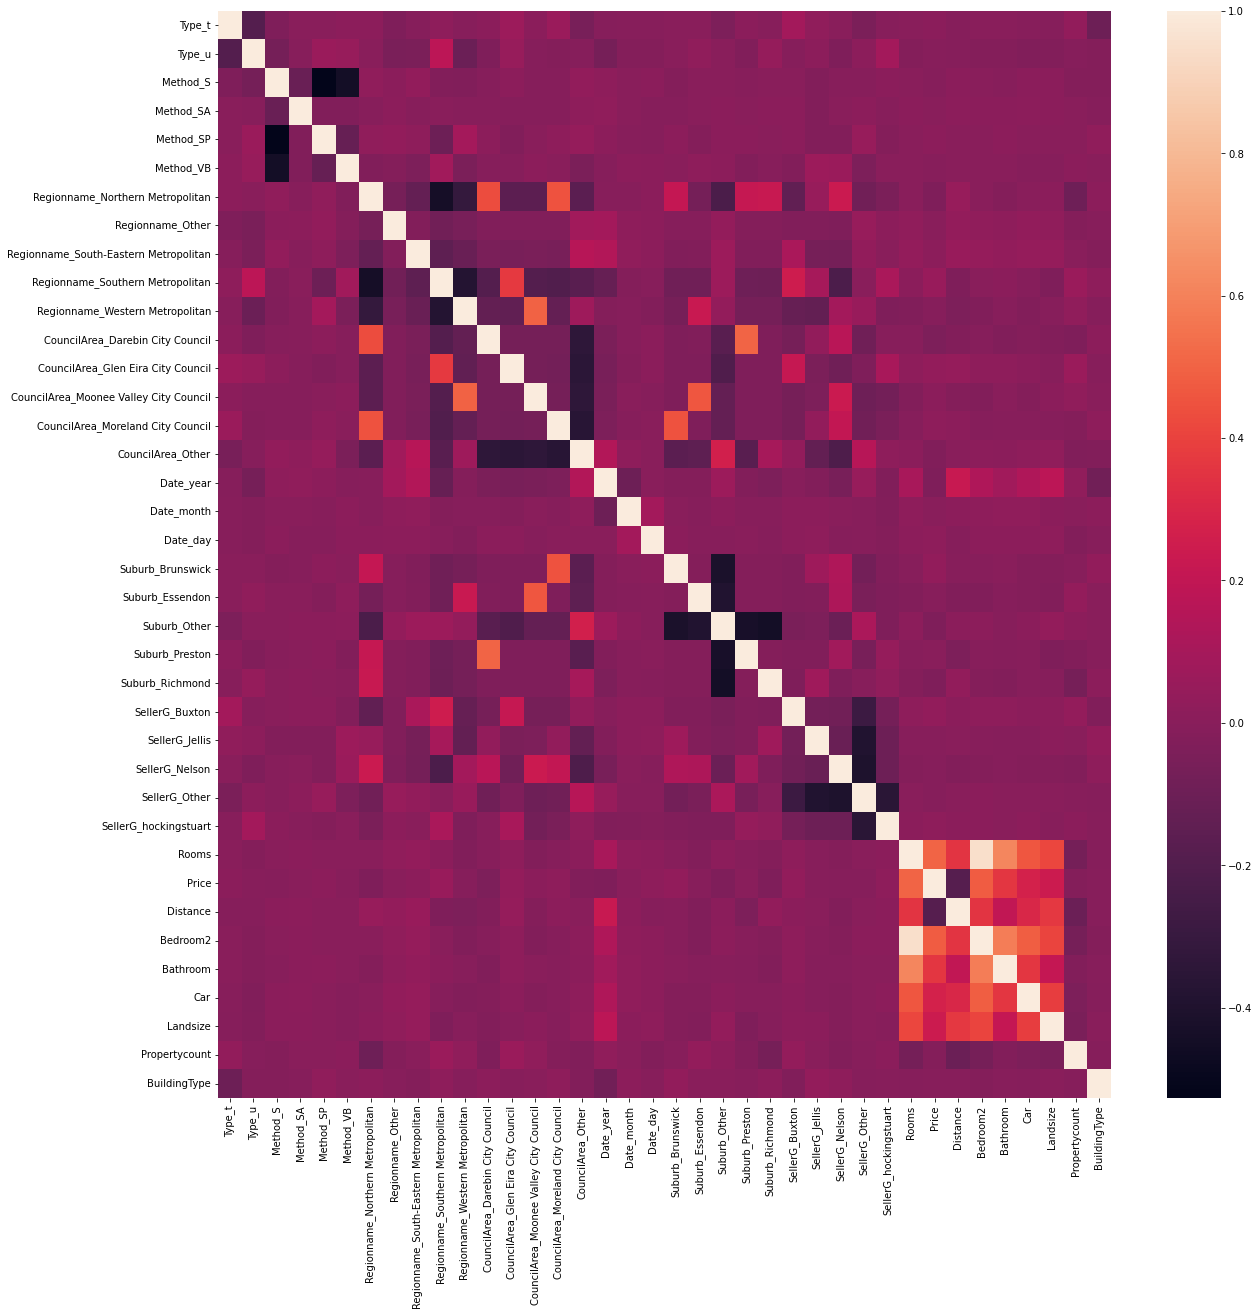

In [96]:
# correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr('spearman'), annot=False)
plt.show()

In [97]:
df.corr('spearman')['Price'].sort_values(ascending = False).head(11)

Price                                 1.000000
Rooms                                 0.500528
Bedroom2                              0.479218
Bathroom                              0.357064
Car                                   0.273038
Landsize                              0.237484
Regionname_Southern Metropolitan      0.054915
CouncilArea_Glen Eira City Council    0.038831
Suburb_Brunswick                      0.033494
SellerG_Buxton                        0.028182
CouncilArea_Moreland City Council     0.021657
Name: Price, dtype: float64

In [98]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.00732881 0.01331924 0.01242931 0.00093091 0.00827842 0.00720251
 0.00897681 0.001776   0.0054286  0.01186399 0.00963605 0.00416821
 0.00537547 0.00596591 0.00636369 0.01052522 0.01692997 0.02519
 0.02728125 0.00446802 0.00229314 0.00652857 0.00103106 0.0010475
 0.00599012 0.00855198 0.00677386 0.01151817 0.00989484 0.11426082
 0.24057907 0.0587952  0.11069551 0.03170163 0.1001483  0.0761492
 0.02060264]


<AxesSubplot:>

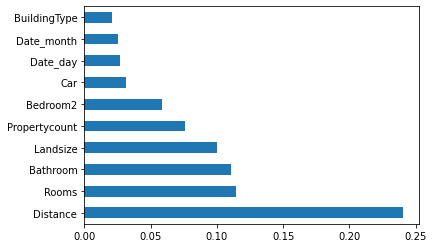

In [99]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')